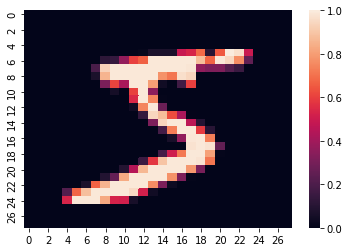

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2940 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1422 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1050 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0879 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0742 - accuracy: 0.9767
313/313 - 1s - loss: 0.0683 - accuracy: 0.9794 - 706ms/epoch - 2ms/step
Epoch 1/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0608 - val_accuracy: 0.9816
Epoch 2/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0603 - val_accuracy: 0.9821
Epoch 3/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0605 - val_accuracy: 0.

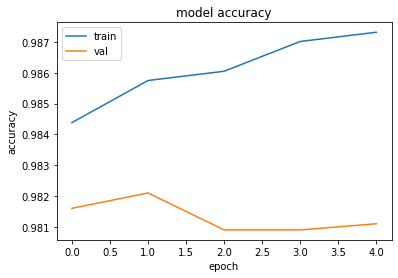

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train,x_test=x_train/255.0, x_test/255.0

sns.heatmap(x_train[0])
plt.show()


model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(10)
])


loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer="adam",loss=loss_fn,metrics=["accuracy"])

model.fit(x_train,y_train,epochs=5)

model.evaluate(x_test,y_test,verbose=2)

val=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=200)

plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()
